# Проект предсказания жанра альбома по его обложке

## Вступление

### Описание проекта:

Тестовое задание.

### Описание данных:

Всего имеется 2 папки с картинками, одна с Георгием Победоносцем, другая все фотографии на которых его нет: 
* georges
* non_georges

### В чем состоит задача?

Основной задачей проекта является разработка и тренировка модели машинного обучения, которая сможет определять фото на котором находится Георгий Победоносец. Для реализации проекта предполагается использование современных инструментов и библиотек машинного обучения и компьютерного зрения, таких как Python, Scikit-Learn, PyTorch, torchvision и fastai.

## Предобработка и анализ данных 

### Загрузка библиотек

In [1]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torchcam

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas requests

Note: you may need to restart the kernel to use updated packages.


In [34]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import requests
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import datasets, transforms, models
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.vision.all import *
from PIL import Image

In [5]:
import hashlib
from torchcam.methods import SmoothGradCAMpp

In [6]:
from torchvision.transforms.functional import to_tensor, to_pil_image
from torchcam.utils import overlay_mask

Расширяем рабочее пространство

In [7]:
from IPython.core.display import display, HTML
display(HTML("""
<style>
.container { 
   width:90% !important; 
   position: relative; 
   right: 25px; 
}
</style>
"""))

C:\Users\Joktun\AppData\Local\Temp\ipykernel_4400\2057739371.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Следующие две ячейки являются функциями, которая отвечают за загрузку картинок по ссылкам из csv файла.

In [32]:
def download_image(url, folder, filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        filepath = os.path.join(folder, filename)
        with open(filepath, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        print(f"Скачано: {filename}")
    except Exception as e:
        print(f"Ошибка при скачивании {url}: {e}")

In [33]:
def download_images_from_csv(csv_file, save_folder):
    data = pd.read_csv(csv_file, header=None, names=["url"])
    os.makedirs(save_folder, exist_ok=True)
    for i, url in enumerate(data["url"]):
        if pd.notna(url):
            filename = f"image_{i+1}.jpg"
            download_image(url, save_folder, filename)

Адреса csv файлов и папок куда нужно сохранять

In [8]:
csv_file_georges = r'C:\Users\Joktun\Desktop\kaggle\georg\georges.csv'
csv_file_non_georges = r'C:\Users\Joktun\Desktop\kaggle\georg\non_georges.csv'

In [9]:
save_folder_georges = r'C:\Users\Joktun\Desktop\kaggle\georg\dataset\george'
save_folder_non_georges = r'C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george'

Применение функции, повторно их запускать не нужно

In [12]:
#download_images_from_csv(csv_file_georges, save_folder_georges)

Скачано: image_1.jpg
Скачано: image_2.jpg
Скачано: image_3.jpg
Скачано: image_4.jpg
Скачано: image_5.jpg
Скачано: image_6.jpg
Скачано: image_7.jpg
Скачано: image_8.jpg
Скачано: image_9.jpg
Скачано: image_10.jpg
Скачано: image_11.jpg
Скачано: image_12.jpg
Скачано: image_13.jpg
Скачано: image_14.jpg
Скачано: image_15.jpg
Скачано: image_16.jpg
Скачано: image_17.jpg
Скачано: image_18.jpg
Скачано: image_19.jpg
Скачано: image_20.jpg
Скачано: image_21.jpg
Скачано: image_22.jpg
Скачано: image_23.jpg
Скачано: image_24.jpg
Скачано: image_25.jpg
Скачано: image_26.jpg
Скачано: image_27.jpg
Скачано: image_28.jpg
Скачано: image_29.jpg
Скачано: image_30.jpg
Скачано: image_31.jpg
Скачано: image_32.jpg
Скачано: image_33.jpg
Скачано: image_34.jpg
Скачано: image_35.jpg
Скачано: image_36.jpg
Скачано: image_37.jpg
Скачано: image_38.jpg
Скачано: image_39.jpg
Скачано: image_40.jpg
Скачано: image_41.jpg
Скачано: image_42.jpg
Скачано: image_43.jpg
Скачано: image_44.jpg
Скачано: image_45.jpg
Скачано: image_46.j

Скачано: image_348.jpg
Скачано: image_349.jpg
Скачано: image_350.jpg
Скачано: image_351.jpg
Скачано: image_352.jpg
Скачано: image_353.jpg
Скачано: image_354.jpg
Скачано: image_355.jpg
Скачано: image_356.jpg
Скачано: image_357.jpg
Скачано: image_358.jpg
Скачано: image_359.jpg
Скачано: image_360.jpg
Скачано: image_361.jpg
Скачано: image_362.jpg
Скачано: image_363.jpg
Скачано: image_364.jpg
Скачано: image_365.jpg
Скачано: image_366.jpg
Скачано: image_367.jpg
Скачано: image_368.jpg
Скачано: image_369.jpg
Скачано: image_370.jpg
Скачано: image_371.jpg
Скачано: image_372.jpg
Скачано: image_373.jpg
Скачано: image_374.jpg
Скачано: image_375.jpg
Скачано: image_376.jpg
Скачано: image_377.jpg
Скачано: image_378.jpg
Скачано: image_379.jpg
Скачано: image_380.jpg
Скачано: image_381.jpg
Скачано: image_382.jpg
Скачано: image_383.jpg
Скачано: image_384.jpg
Скачано: image_385.jpg
Скачано: image_386.jpg
Скачано: image_387.jpg
Скачано: image_388.jpg
Скачано: image_389.jpg
Скачано: image_390.jpg
Скачано: im

Скачано: image_705.jpg
Скачано: image_706.jpg
Скачано: image_707.jpg
Скачано: image_708.jpg
Скачано: image_709.jpg
Скачано: image_710.jpg
Скачано: image_711.jpg
Скачано: image_712.jpg
Скачано: image_713.jpg
Скачано: image_714.jpg
Скачано: image_715.jpg
Скачано: image_716.jpg
Скачано: image_717.jpg
Скачано: image_718.jpg
Скачано: image_719.jpg
Скачано: image_720.jpg
Скачано: image_721.jpg
Скачано: image_722.jpg
Скачано: image_723.jpg
Скачано: image_724.jpg
Скачано: image_725.jpg
Скачано: image_726.jpg
Скачано: image_727.jpg
Скачано: image_728.jpg
Скачано: image_729.jpg
Скачано: image_730.jpg
Скачано: image_731.jpg
Скачано: image_732.jpg
Скачано: image_733.jpg
Скачано: image_734.jpg
Скачано: image_735.jpg
Скачано: image_736.jpg
Скачано: image_737.jpg
Скачано: image_738.jpg
Скачано: image_739.jpg
Скачано: image_740.jpg
Скачано: image_741.jpg
Скачано: image_742.jpg
Скачано: image_743.jpg
Скачано: image_744.jpg
Скачано: image_745.jpg
Скачано: image_746.jpg
Скачано: image_747.jpg
Скачано: im

Скачано: image_1043.jpg
Скачано: image_1044.jpg
Скачано: image_1045.jpg
Скачано: image_1046.jpg
Скачано: image_1047.jpg
Скачано: image_1048.jpg
Скачано: image_1049.jpg
Скачано: image_1050.jpg
Скачано: image_1051.jpg
Скачано: image_1052.jpg
Скачано: image_1053.jpg
Скачано: image_1054.jpg
Скачано: image_1055.jpg
Скачано: image_1056.jpg
Скачано: image_1057.jpg
Скачано: image_1058.jpg
Скачано: image_1059.jpg
Скачано: image_1060.jpg
Скачано: image_1061.jpg
Скачано: image_1062.jpg
Скачано: image_1063.jpg
Скачано: image_1064.jpg
Скачано: image_1065.jpg
Скачано: image_1066.jpg
Скачано: image_1067.jpg
Скачано: image_1068.jpg
Скачано: image_1069.jpg
Скачано: image_1070.jpg
Скачано: image_1071.jpg
Скачано: image_1072.jpg
Скачано: image_1073.jpg
Скачано: image_1074.jpg
Скачано: image_1075.jpg
Скачано: image_1076.jpg
Скачано: image_1077.jpg
Скачано: image_1078.jpg
Скачано: image_1079.jpg
Скачано: image_1080.jpg
Скачано: image_1081.jpg
Скачано: image_1082.jpg
Скачано: image_1083.jpg
Скачано: image_1

Скачано: image_1385.jpg
Скачано: image_1386.jpg
Скачано: image_1387.jpg
Скачано: image_1388.jpg
Скачано: image_1389.jpg
Скачано: image_1390.jpg
Скачано: image_1391.jpg
Скачано: image_1392.jpg
Скачано: image_1393.jpg
Скачано: image_1394.jpg
Скачано: image_1395.jpg
Скачано: image_1396.jpg
Скачано: image_1397.jpg
Скачано: image_1398.jpg
Скачано: image_1399.jpg
Скачано: image_1400.jpg
Скачано: image_1401.jpg
Скачано: image_1402.jpg
Скачано: image_1403.jpg
Скачано: image_1404.jpg
Скачано: image_1405.jpg
Скачано: image_1406.jpg
Скачано: image_1407.jpg
Скачано: image_1408.jpg
Скачано: image_1409.jpg
Скачано: image_1410.jpg
Скачано: image_1411.jpg
Скачано: image_1412.jpg
Скачано: image_1413.jpg
Скачано: image_1414.jpg
Скачано: image_1415.jpg
Скачано: image_1416.jpg
Скачано: image_1417.jpg
Скачано: image_1418.jpg
Скачано: image_1419.jpg
Скачано: image_1420.jpg
Скачано: image_1421.jpg
Скачано: image_1422.jpg
Скачано: image_1423.jpg
Скачано: image_1424.jpg
Скачано: image_1425.jpg
Скачано: image_1

Скачано: image_1727.jpg
Скачано: image_1728.jpg
Скачано: image_1729.jpg
Скачано: image_1730.jpg
Скачано: image_1731.jpg
Скачано: image_1732.jpg
Скачано: image_1733.jpg
Скачано: image_1734.jpg
Скачано: image_1735.jpg
Скачано: image_1736.jpg
Скачано: image_1737.jpg
Скачано: image_1738.jpg
Скачано: image_1739.jpg
Скачано: image_1740.jpg
Скачано: image_1741.jpg
Скачано: image_1742.jpg
Скачано: image_1743.jpg
Скачано: image_1744.jpg
Скачано: image_1745.jpg
Скачано: image_1746.jpg
Скачано: image_1747.jpg
Скачано: image_1748.jpg
Скачано: image_1749.jpg
Скачано: image_1750.jpg
Скачано: image_1751.jpg
Скачано: image_1752.jpg
Скачано: image_1753.jpg
Скачано: image_1754.jpg
Скачано: image_1755.jpg
Скачано: image_1756.jpg
Скачано: image_1757.jpg
Скачано: image_1758.jpg
Скачано: image_1759.jpg
Скачано: image_1760.jpg
Скачано: image_1761.jpg
Скачано: image_1762.jpg
Скачано: image_1763.jpg
Скачано: image_1764.jpg
Скачано: image_1765.jpg
Скачано: image_1766.jpg
Скачано: image_1767.jpg
Скачано: image_1

Скачано: image_2069.jpg
Скачано: image_2070.jpg
Скачано: image_2071.jpg
Скачано: image_2072.jpg
Скачано: image_2073.jpg
Скачано: image_2074.jpg
Скачано: image_2075.jpg
Скачано: image_2076.jpg
Скачано: image_2077.jpg
Скачано: image_2078.jpg
Скачано: image_2079.jpg
Скачано: image_2080.jpg
Скачано: image_2081.jpg
Скачано: image_2082.jpg
Скачано: image_2083.jpg
Скачано: image_2084.jpg
Скачано: image_2085.jpg
Скачано: image_2086.jpg
Скачано: image_2087.jpg
Скачано: image_2088.jpg
Скачано: image_2089.jpg
Скачано: image_2090.jpg
Скачано: image_2091.jpg
Скачано: image_2092.jpg
Скачано: image_2093.jpg
Скачано: image_2094.jpg
Скачано: image_2095.jpg
Скачано: image_2096.jpg
Скачано: image_2097.jpg
Скачано: image_2098.jpg
Скачано: image_2099.jpg
Скачано: image_2100.jpg
Скачано: image_2101.jpg
Скачано: image_2102.jpg
Скачано: image_2103.jpg
Скачано: image_2104.jpg
Скачано: image_2105.jpg
Скачано: image_2106.jpg
Скачано: image_2107.jpg
Скачано: image_2108.jpg
Скачано: image_2109.jpg
Скачано: image_2

Скачано: image_2411.jpg
Скачано: image_2412.jpg
Скачано: image_2413.jpg
Скачано: image_2414.jpg
Скачано: image_2415.jpg
Скачано: image_2416.jpg
Скачано: image_2417.jpg
Скачано: image_2418.jpg
Скачано: image_2419.jpg
Скачано: image_2420.jpg
Скачано: image_2421.jpg
Скачано: image_2422.jpg
Скачано: image_2423.jpg
Скачано: image_2424.jpg
Скачано: image_2425.jpg
Скачано: image_2426.jpg
Скачано: image_2427.jpg
Скачано: image_2428.jpg
Скачано: image_2429.jpg
Скачано: image_2430.jpg
Скачано: image_2431.jpg
Скачано: image_2432.jpg
Скачано: image_2433.jpg
Скачано: image_2434.jpg
Скачано: image_2435.jpg
Скачано: image_2436.jpg
Скачано: image_2437.jpg
Скачано: image_2438.jpg
Скачано: image_2439.jpg
Скачано: image_2440.jpg
Скачано: image_2441.jpg
Скачано: image_2442.jpg
Скачано: image_2443.jpg
Скачано: image_2444.jpg
Скачано: image_2445.jpg
Скачано: image_2446.jpg
Скачано: image_2447.jpg
Скачано: image_2448.jpg
Скачано: image_2449.jpg
Скачано: image_2450.jpg
Скачано: image_2451.jpg
Скачано: image_2

In [13]:
#download_images_from_csv(csv_file_non_georges, save_folder_non_georges)

Скачано: image_1.jpg
Скачано: image_2.jpg
Скачано: image_3.jpg
Скачано: image_4.jpg
Скачано: image_5.jpg
Скачано: image_6.jpg
Скачано: image_7.jpg
Скачано: image_8.jpg
Скачано: image_9.jpg
Скачано: image_10.jpg
Скачано: image_11.jpg
Скачано: image_12.jpg
Скачано: image_13.jpg
Скачано: image_14.jpg
Скачано: image_15.jpg
Скачано: image_16.jpg
Скачано: image_17.jpg
Скачано: image_18.jpg
Скачано: image_19.jpg
Скачано: image_20.jpg
Скачано: image_21.jpg
Скачано: image_22.jpg
Скачано: image_23.jpg
Скачано: image_24.jpg
Скачано: image_25.jpg
Скачано: image_26.jpg
Скачано: image_27.jpg
Скачано: image_28.jpg
Скачано: image_29.jpg
Скачано: image_30.jpg
Скачано: image_31.jpg
Скачано: image_32.jpg
Скачано: image_33.jpg
Скачано: image_34.jpg
Скачано: image_35.jpg
Скачано: image_36.jpg
Скачано: image_37.jpg
Скачано: image_38.jpg
Скачано: image_39.jpg
Скачано: image_40.jpg
Скачано: image_41.jpg
Скачано: image_42.jpg
Скачано: image_43.jpg
Скачано: image_44.jpg
Скачано: image_45.jpg
Скачано: image_46.j

Скачано: image_362.jpg
Скачано: image_363.jpg
Скачано: image_364.jpg
Скачано: image_365.jpg
Скачано: image_366.jpg
Скачано: image_367.jpg
Скачано: image_368.jpg
Скачано: image_369.jpg
Скачано: image_370.jpg
Скачано: image_371.jpg
Скачано: image_372.jpg
Скачано: image_373.jpg
Скачано: image_374.jpg
Скачано: image_375.jpg
Скачано: image_376.jpg
Скачано: image_377.jpg
Скачано: image_378.jpg
Скачано: image_379.jpg
Скачано: image_380.jpg
Скачано: image_381.jpg
Скачано: image_382.jpg
Скачано: image_383.jpg
Скачано: image_384.jpg
Скачано: image_385.jpg
Скачано: image_386.jpg
Скачано: image_387.jpg
Скачано: image_388.jpg
Скачано: image_389.jpg
Скачано: image_390.jpg
Скачано: image_391.jpg
Скачано: image_392.jpg
Скачано: image_393.jpg
Скачано: image_394.jpg
Скачано: image_395.jpg
Скачано: image_396.jpg
Скачано: image_397.jpg
Скачано: image_398.jpg
Скачано: image_399.jpg
Скачано: image_400.jpg
Скачано: image_401.jpg
Скачано: image_402.jpg
Скачано: image_403.jpg
Скачано: image_404.jpg
Скачано: im

Скачано: image_702.jpg
Скачано: image_703.jpg
Скачано: image_704.jpg
Скачано: image_705.jpg
Скачано: image_706.jpg
Скачано: image_707.jpg
Скачано: image_708.jpg
Скачано: image_709.jpg
Скачано: image_710.jpg
Скачано: image_711.jpg
Скачано: image_712.jpg
Скачано: image_713.jpg
Скачано: image_714.jpg
Скачано: image_715.jpg
Скачано: image_716.jpg
Скачано: image_717.jpg
Скачано: image_718.jpg
Скачано: image_719.jpg
Скачано: image_720.jpg
Скачано: image_721.jpg
Скачано: image_722.jpg
Скачано: image_723.jpg
Скачано: image_724.jpg
Скачано: image_725.jpg
Скачано: image_726.jpg
Скачано: image_727.jpg
Скачано: image_728.jpg
Скачано: image_729.jpg
Скачано: image_730.jpg
Скачано: image_731.jpg
Скачано: image_732.jpg
Скачано: image_733.jpg
Скачано: image_734.jpg
Скачано: image_735.jpg
Скачано: image_736.jpg
Скачано: image_737.jpg
Скачано: image_738.jpg
Скачано: image_739.jpg
Скачано: image_740.jpg
Скачано: image_741.jpg
Скачано: image_742.jpg
Скачано: image_743.jpg
Скачано: image_744.jpg
Скачано: im

Скачано: image_1056.jpg
Скачано: image_1057.jpg
Скачано: image_1058.jpg
Скачано: image_1059.jpg
Скачано: image_1060.jpg
Скачано: image_1061.jpg
Скачано: image_1062.jpg
Скачано: image_1063.jpg
Скачано: image_1064.jpg
Скачано: image_1065.jpg
Скачано: image_1066.jpg
Скачано: image_1067.jpg
Скачано: image_1068.jpg
Скачано: image_1069.jpg
Скачано: image_1070.jpg
Скачано: image_1071.jpg
Скачано: image_1072.jpg
Скачано: image_1073.jpg
Скачано: image_1074.jpg
Скачано: image_1075.jpg
Скачано: image_1076.jpg
Скачано: image_1077.jpg
Скачано: image_1078.jpg
Скачано: image_1079.jpg
Скачано: image_1080.jpg
Скачано: image_1081.jpg
Скачано: image_1082.jpg
Скачано: image_1083.jpg
Скачано: image_1084.jpg
Скачано: image_1085.jpg
Скачано: image_1086.jpg
Скачано: image_1087.jpg
Скачано: image_1088.jpg
Скачано: image_1089.jpg
Скачано: image_1090.jpg
Скачано: image_1091.jpg
Скачано: image_1092.jpg
Скачано: image_1093.jpg
Скачано: image_1094.jpg
Скачано: image_1095.jpg
Скачано: image_1096.jpg
Скачано: image_1

Скачано: image_1398.jpg
Скачано: image_1399.jpg
Скачано: image_1400.jpg
Скачано: image_1401.jpg
Скачано: image_1402.jpg
Скачано: image_1403.jpg
Скачано: image_1404.jpg
Скачано: image_1405.jpg
Скачано: image_1406.jpg
Скачано: image_1407.jpg
Скачано: image_1408.jpg
Скачано: image_1409.jpg
Скачано: image_1410.jpg
Скачано: image_1411.jpg
Скачано: image_1412.jpg
Скачано: image_1413.jpg
Скачано: image_1414.jpg
Скачано: image_1415.jpg
Скачано: image_1416.jpg
Скачано: image_1417.jpg
Скачано: image_1418.jpg
Скачано: image_1419.jpg
Скачано: image_1420.jpg
Скачано: image_1421.jpg
Скачано: image_1422.jpg
Скачано: image_1423.jpg
Скачано: image_1424.jpg
Скачано: image_1425.jpg
Скачано: image_1426.jpg
Скачано: image_1427.jpg
Скачано: image_1428.jpg
Скачано: image_1429.jpg
Скачано: image_1430.jpg
Скачано: image_1431.jpg
Скачано: image_1432.jpg
Скачано: image_1433.jpg
Скачано: image_1434.jpg
Скачано: image_1435.jpg
Скачано: image_1436.jpg
Скачано: image_1437.jpg
Скачано: image_1438.jpg
Скачано: image_1

Скачано: image_1740.jpg
Скачано: image_1741.jpg
Скачано: image_1742.jpg
Скачано: image_1743.jpg
Скачано: image_1744.jpg
Скачано: image_1745.jpg
Скачано: image_1746.jpg
Скачано: image_1747.jpg
Скачано: image_1748.jpg
Скачано: image_1749.jpg
Скачано: image_1750.jpg
Скачано: image_1751.jpg
Скачано: image_1752.jpg
Скачано: image_1753.jpg
Скачано: image_1754.jpg
Скачано: image_1755.jpg
Скачано: image_1756.jpg
Скачано: image_1757.jpg
Скачано: image_1758.jpg
Скачано: image_1759.jpg
Скачано: image_1760.jpg
Скачано: image_1761.jpg
Скачано: image_1762.jpg
Скачано: image_1763.jpg
Скачано: image_1764.jpg
Скачано: image_1765.jpg
Скачано: image_1766.jpg
Скачано: image_1767.jpg
Скачано: image_1768.jpg
Скачано: image_1769.jpg
Скачано: image_1770.jpg
Скачано: image_1771.jpg
Скачано: image_1772.jpg
Скачано: image_1773.jpg
Скачано: image_1774.jpg
Скачано: image_1775.jpg
Скачано: image_1776.jpg
Скачано: image_1777.jpg
Скачано: image_1778.jpg
Скачано: image_1779.jpg
Скачано: image_1780.jpg
Скачано: image_1

Скачано: image_2074.jpg
Скачано: image_2075.jpg
Скачано: image_2076.jpg
Скачано: image_2077.jpg
Скачано: image_2078.jpg
Скачано: image_2079.jpg
Скачано: image_2080.jpg
Скачано: image_2081.jpg
Скачано: image_2082.jpg
Скачано: image_2083.jpg
Скачано: image_2084.jpg
Скачано: image_2085.jpg
Скачано: image_2086.jpg
Скачано: image_2087.jpg
Скачано: image_2088.jpg
Скачано: image_2089.jpg
Скачано: image_2090.jpg
Скачано: image_2091.jpg
Скачано: image_2092.jpg
Скачано: image_2093.jpg
Скачано: image_2094.jpg
Скачано: image_2095.jpg
Скачано: image_2096.jpg
Скачано: image_2097.jpg
Скачано: image_2098.jpg
Скачано: image_2099.jpg
Скачано: image_2100.jpg
Скачано: image_2101.jpg
Скачано: image_2102.jpg
Скачано: image_2103.jpg
Скачано: image_2104.jpg
Скачано: image_2105.jpg
Скачано: image_2106.jpg
Скачано: image_2107.jpg
Скачано: image_2108.jpg
Скачано: image_2109.jpg
Скачано: image_2110.jpg
Скачано: image_2111.jpg
Скачано: image_2112.jpg
Скачано: image_2113.jpg
Скачано: image_2114.jpg
Скачано: image_2

Скачано: image_2408.jpg
Скачано: image_2409.jpg
Скачано: image_2410.jpg
Скачано: image_2411.jpg
Скачано: image_2412.jpg
Скачано: image_2413.jpg
Скачано: image_2414.jpg
Скачано: image_2415.jpg
Скачано: image_2416.jpg
Скачано: image_2417.jpg
Скачано: image_2418.jpg
Скачано: image_2419.jpg
Скачано: image_2420.jpg
Скачано: image_2421.jpg
Скачано: image_2422.jpg
Скачано: image_2423.jpg
Скачано: image_2424.jpg
Скачано: image_2425.jpg
Скачано: image_2426.jpg
Скачано: image_2427.jpg
Скачано: image_2428.jpg
Скачано: image_2429.jpg
Скачано: image_2430.jpg
Скачано: image_2431.jpg
Скачано: image_2432.jpg
Скачано: image_2433.jpg
Скачано: image_2434.jpg
Скачано: image_2435.jpg
Скачано: image_2436.jpg
Скачано: image_2437.jpg
Скачано: image_2438.jpg
Скачано: image_2439.jpg
Скачано: image_2440.jpg
Скачано: image_2441.jpg
Скачано: image_2442.jpg
Скачано: image_2443.jpg
Скачано: image_2444.jpg
Скачано: image_2445.jpg
Скачано: image_2446.jpg
Скачано: image_2447.jpg
Скачано: image_2448.jpg
Скачано: image_2

Скачано: image_2750.jpg
Скачано: image_2751.jpg
Скачано: image_2752.jpg
Скачано: image_2753.jpg
Скачано: image_2754.jpg
Скачано: image_2755.jpg
Скачано: image_2756.jpg
Скачано: image_2757.jpg
Скачано: image_2758.jpg
Скачано: image_2759.jpg
Скачано: image_2760.jpg
Скачано: image_2761.jpg
Скачано: image_2762.jpg
Скачано: image_2763.jpg
Скачано: image_2764.jpg
Скачано: image_2765.jpg
Скачано: image_2766.jpg
Скачано: image_2767.jpg
Скачано: image_2768.jpg
Скачано: image_2769.jpg
Скачано: image_2770.jpg
Скачано: image_2771.jpg
Скачано: image_2772.jpg
Скачано: image_2773.jpg
Скачано: image_2774.jpg
Скачано: image_2775.jpg
Скачано: image_2776.jpg
Скачано: image_2777.jpg
Скачано: image_2778.jpg
Скачано: image_2779.jpg
Скачано: image_2780.jpg
Скачано: image_2781.jpg
Скачано: image_2782.jpg
Скачано: image_2783.jpg
Скачано: image_2784.jpg
Скачано: image_2785.jpg
Скачано: image_2786.jpg
Скачано: image_2787.jpg
Скачано: image_2788.jpg
Скачано: image_2789.jpg
Скачано: image_2790.jpg
Скачано: image_2

Скачано: image_3092.jpg
Скачано: image_3093.jpg
Скачано: image_3094.jpg
Скачано: image_3095.jpg
Скачано: image_3096.jpg
Скачано: image_3097.jpg
Скачано: image_3098.jpg
Скачано: image_3099.jpg
Скачано: image_3100.jpg
Скачано: image_3101.jpg
Скачано: image_3102.jpg
Скачано: image_3103.jpg
Скачано: image_3104.jpg
Скачано: image_3105.jpg
Скачано: image_3106.jpg
Скачано: image_3107.jpg
Скачано: image_3108.jpg
Скачано: image_3109.jpg
Скачано: image_3110.jpg
Скачано: image_3111.jpg
Скачано: image_3112.jpg
Скачано: image_3113.jpg
Скачано: image_3114.jpg
Скачано: image_3115.jpg
Скачано: image_3116.jpg
Скачано: image_3117.jpg
Скачано: image_3118.jpg
Скачано: image_3119.jpg
Скачано: image_3120.jpg
Скачано: image_3121.jpg
Скачано: image_3122.jpg
Скачано: image_3123.jpg
Скачано: image_3124.jpg
Скачано: image_3125.jpg
Скачано: image_3126.jpg
Скачано: image_3127.jpg
Скачано: image_3128.jpg
Скачано: image_3129.jpg
Скачано: image_3130.jpg
Скачано: image_3131.jpg
Скачано: image_3132.jpg
Скачано: image_3

### Поиск дубликатов

Адрес папок с картинками

In [10]:
root_folder_george = r'C:\Users\Joktun\Desktop\kaggle\georg\dataset\george'

In [11]:
root_folder_non_george = r'C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george'

Генерация хэш-суммы файла. Это позволяет идентифицировать файлы с идентичным содержимым

In [12]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

Ищем и выводим список дубликатов файлов изображений, а также подсчитывает их общее количество, и сразу удаляем, оставляя только первый экземпляр

In [13]:
def find_duplicates(root_folder):
    duplicates = {}
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
                filepath = os.path.join(dirpath, filename)
                img_hash = file_hash(filepath)
                if img_hash in duplicates:
                    duplicates[img_hash].append(filepath)
                else:
                    duplicates[img_hash] = [filepath]
 
    total_duplicates = 0
    for key, files in duplicates.items():
        if len(files) > 1:
            print(f"Найдены дубликаты ({len(files)} файлов):")
            # Сохраняем первый файл, остальные удаляем
            for i, file in enumerate(files):
                if i == 0:
                    print(f"Оставляем файл: {file}")
                else:
                    print(f"Удаляем файл: {file}")
                    os.remove(file)
                    total_duplicates += 1
            print("\n")

    print(f"Общее количество дубликатных файлов: {total_duplicates}")

Применение функции

In [14]:
find_duplicates(root_folder_george)

Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_1.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_1283.jpg


Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_10.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_736.jpg


Найдены дубликаты (3 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_100.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_2469.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_353.jpg


Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_1003.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_30.jpg


Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\george\image_1004.jpg
Удаляем файл: C:\Users\Joktun\De

Около 12 % дубликатов в папке george, удаляем дубликаты и проверяем, что их нет

In [17]:
find_duplicates(root_folder_george)

Общее количество дубликатных файлов: 0


In [15]:
find_duplicates(root_folder_non_george)

Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_100.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_1832.jpg


Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_137.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_1864.jpg


Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_138.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_2583.jpg


Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_166.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_1897.jpg


Найдены дубликаты (2 файлов):
Оставляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\image_169.jpg
Удаляем файл: C:\Users\Joktun\Desktop\kaggle\georg\dataset\non_george\im

Около 0,8 % дубликатов в папке non_george, удаляем дубликаты и проверяем, что их нет

In [18]:
find_duplicates(root_folder_non_george)

Общее количество дубликатных файлов: 0


## Обучение моделей

### Baseline Модель

Устройство, на котором будем проводить обучение

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Преобразование изображения в тензор

In [20]:
image_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Создание датасета изображений

In [21]:
root_folder_dataset = r'C:\Users\Joktun\Desktop\kaggle\georg\dataset'

In [22]:
dataset = datasets.ImageFolder(root=root_folder_dataset, transform=image_transform)

Разделение датасета на обучающую и тестовую выборки

In [23]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

Загрузка предобученной модели ResNet-18

In [24]:
model = models.resnet18(pretrained=True)

C:\Users\Joktun\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Joktun\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Создание загрузчиков данных

In [25]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

Заменяем последний слой (голову классификации) на новый слой с количеством классов равным количеству папок (в нашем случае 2)

In [26]:
num_genres = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_genres)

Перенос модели на GPU, если доступно

In [27]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Оптимизатор и функция потерь

In [28]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

Функция для обучения модели

In [29]:
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

Обучение модели

In [30]:
train_model(model, criterion, optimizer)

Epoch 1/5, Loss: 0.5252
Epoch 2/5, Loss: 0.3644
Epoch 3/5, Loss: 0.3368
Epoch 4/5, Loss: 0.2492
Epoch 5/5, Loss: 0.2206


Функция для тестирования модели

In [31]:
def test_model(model):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_preds), np.array(all_labels)

Тестирование модели и вычисление метрик

In [36]:
preds, labels = test_model(model)

In [37]:
precision = precision_score(labels, preds, average='weighted')
recall = recall_score(labels, preds, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8454
Recall: 0.8401


In [38]:
if len(np.unique(labels)) > 2:
    roc_auc = roc_auc_score(labels, preds, multi_class='ovr', average='weighted')
else:
    roc_auc = roc_auc_score(labels, preds)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.8154


Вычисление матрицы ошибок

In [39]:
conf_matrix = confusion_matrix(labels, preds)

Вывод матрицы ошибок в виде графика

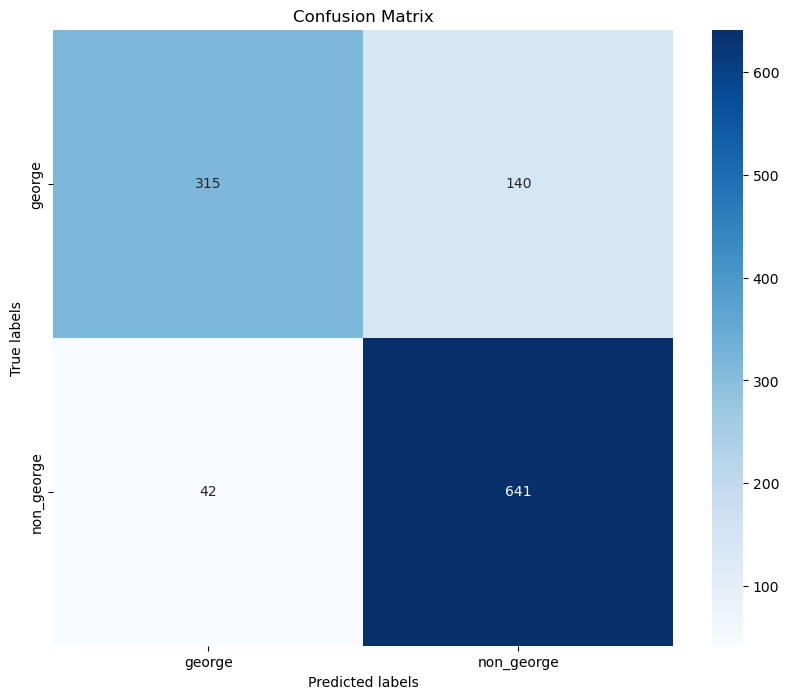

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Вывод по baseline модели

Модель демонстрирует уверенную работу с балансом между Precision и Recall.
Значение ROC AUC выше 0.8 говорит о качественной базовой классификации.
Возможности улучшения:
* Снижение FN, чтобы повысить Recall.
* Увеличение Precision, особенно если ложноположительные прогнозы нежелательны.
* Настройка порога принятия решений (threshold) или использование более сложной модели.

### Нейросеть

Создание загрузчика данных изображений

In [43]:
path = r'C:\Users\Joktun\Desktop\kaggle\georg\dataset'
dls = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,   
    seed=42,        
    item_tfms=Resize(224)  
)

Создание и настройка учебника (модели обучения)

In [47]:
def RocAucMetric(inp, targ):
    "Вычисляет ROC AUC для бинарной или многоклассовой классификации"
    from sklearn.metrics import roc_auc_score
    try:
        if len(targ.shape) == 1:
            targ = F.one_hot(targ, num_classes=inp.shape[1])
        return roc_auc_score(targ.cpu(), inp.softmax(dim=-1).cpu(), multi_class='ovr', average='weighted')
    except ValueError:
        return 0.0

In [50]:
learn = vision_learner(
    dls, 
    resnet34, 
    metrics=[ 
        Recall(average='weighted'), 
        Precision(average='weighted'), 
        RocAucMetric
    ], 
    cbs=EarlyStoppingCallback(patience=3)
)

Дообучение модели

In [51]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,recall_score,precision_score,RocAucMetric,time
0,0.752393,0.494801,0.816183,0.817992,0.900771,07:26


epoch,train_loss,valid_loss,recall_score,precision_score,RocAucMetric,time
0,0.425953,0.326324,0.876869,0.877568,0.949457,09:42
1,0.294345,0.245227,0.917326,0.918611,0.971817,09:43
2,0.169366,0.227557,0.930519,0.931072,0.976670,10:00
3,0.092124,0.224636,0.937555,0.937869,0.978364,09:44
4,0.055675,0.223874,0.933157,0.933157,0.978717,10:03


Вывод матрицы ошибок в виде графика

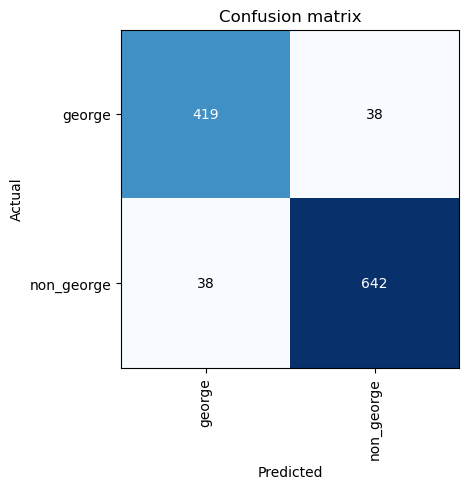

In [52]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Вывод по нейросетевой модели

* Новая модель демонстрирует значительное улучшение по всем ключевым метрикам (Precision, Recall, ROC AUC).
* Количество ошибок (FN и FP) сократилось, особенно для класса "george", что делает модель более надежной для использования.
* Финальная модель явно превосходит базовую по производительности и может быть рекомендована для развертывания в продакшн.
* При необходимости дальнейшего улучшения можно провести дополнительные эксперименты с архитектурой модели или данными.

## Общий вывод

Модель демонстрирует высокие результаты и надежность. Она способна стать основным компонентом проекта и эффективно решать задачу правильного определения Георгия Победоносца.

### Рекомендации по проекту
Тестирование в реальных условиях:

* Проверить модель на данных, которые максимально приближены к практическому использованию (например, сложные изображения или редкие случаи Георгия Победоносца). Оценить влияние ошибок на общую задачу проекта (особенно FN).

Уточнение данных:

* Возможно, можно дополнительно улучшить модель, добавив в обучающий набор редкие и сложные примеры, чтобы еще больше уменьшить FN.

Пользовательские сценарии:

* Обеспечить обратную связь для корректировки модели в случае реальных ложных срабатываний или пропусков.